In [1]:
import importlib
import pandas as pd
import drawChart as dc
import matplotlib.pyplot as plt
import reportTools as rt

# Python Project
**Authors** <br>
    *Michał Sasuła*

## Thema nr 4:
Kim jesteśmy i dokąd zmierzamy (zawodowo)?
* [wyniki ankiety pracowniczej](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) - opracowywane dane
* Cel Statystyczny: Analiza najciekawszych zawodów pod względem
zadowolenia, poziomu zarobków oraz wymaganego poziomu edukacji.
* Cel Python: Aplikacja służąca do wyznaczenia poziomu na jakim się
znajdujemy oraz wskazania co możemy poprawić abyśmy dostali lepszą
pracę.

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
# dodano dodatkową kolumnę pomocniczą celem łatwiejszej agregacji danych
data['years_at_company_indicator'] = data['YearsAtCompany'].apply(lambda x: x if x<=20 else 21)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,years_at_company_indicator
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,6
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,8
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,5
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,6
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,9


### Basic info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   object
 2   BusinessTravel              1470 non-null   object
 3   DailyRate                   1470 non-null   int64 
 4   Department                  1470 non-null   object
 5   DistanceFromHome            1470 non-null   int64 
 6   Education                   1470 non-null   int64 
 7   EducationField              1470 non-null   object
 8   EmployeeCount               1470 non-null   int64 
 9   EmployeeNumber              1470 non-null   int64 
 10  EnvironmentSatisfaction     1470 non-null   int64 
 11  Gender                      1470 non-null   object
 12  HourlyRate                  1470 non-null   int64 
 13  JobInvolvement              1470 non-null   int6

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,years_at_company_indicator
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,6.796599
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,5.424661
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,5.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,9.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,21.000000


In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   object
 2   BusinessTravel              1470 non-null   object
 3   DailyRate                   1470 non-null   int64 
 4   Department                  1470 non-null   object
 5   DistanceFromHome            1470 non-null   int64 
 6   Education                   1470 non-null   int64 
 7   EducationField              1470 non-null   object
 8   EmployeeCount               1470 non-null   int64 
 9   EmployeeNumber              1470 non-null   int64 
 10  EnvironmentSatisfaction     1470 non-null   int64 
 11  Gender                      1470 non-null   object
 12  HourlyRate                  1470 non-null   int64 
 13  JobInvolvement              1470 non-null   int6

### Basic Analysis

#### For Department = Human Resources

In [7]:
import drawChart as dc
importlib.reload(dc)

hr_data = dc.drawGroupByAndCount(data, ['Department','JobRole', 'JobLevel'], ['Sales'])
hr_data


Department == "Sales"


count
Department JobRole              JobLevel       
Sales      Manager              3             4
                                4            20
                                5            13
           Sales Executive      2           233
                                3            79
                                4            14
           Sales Representative 1            76
                                2             7

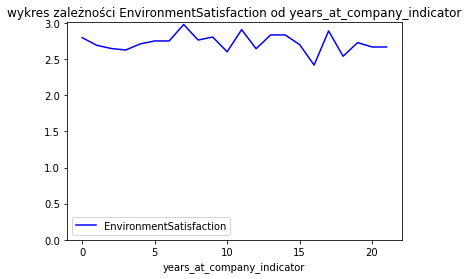

In [130]:
importlib.reload(dc)
dc.drawFeatureOverTime(data, 'years_at_company_indicator', 'EnvironmentSatisfaction')

In [9]:
importlib.reload(rt)
filtered_data = rt.getByDepartmentJobRoleLevelAndMonthlyIncome(data, 'Sales', "Manager", 3, 1000)


In [10]:
filtered_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,years_at_company_indicator
215,41,No,Travel_Rarely,896,Sales,6,3,Life Sciences,1,298,...,80,0,16,3,3,1,0,0,0,1
352,48,No,Travel_Rarely,530,Sales,29,1,Medical,1,473,...,80,1,15,3,1,0,0,0,0,0
456,31,No,Travel_Rarely,688,Sales,7,3,Life Sciences,1,613,...,80,1,10,3,2,5,4,0,1,5
758,59,No,Travel_Rarely,1089,Sales,1,2,Technical Degree,1,1048,...,80,1,14,1,1,6,4,0,4,6


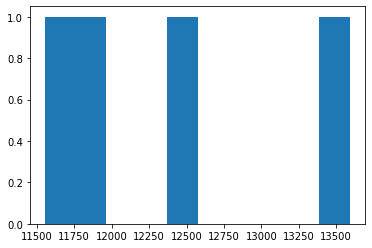

In [133]:
dc.drawHistogramWithYourPosition(filtered_data, 'MonthlyIncome')